In [1]:
import numpy as np
import pandas as pd
import sqlite3
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect("../db/stocks.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

[('growth_stock',), ('value_stock',), ('inflation_5yr',), ('exchange',), ('CPI',), ('leverage',), ('spending',), ('GDP',), ('treasury_10yr',)]


In [3]:
cmd = '''
SELECT g.Date AS Date,
        g."Adj Close" AS GrowthStock_AdjClose,
        (g."Adj Close" - LAG(g."Adj Close", 1) OVER (ORDER BY g.Date))/ 
                LAG(g."Adj Close", 1) OVER (ORDER BY g.Date) AS GrowthStock_PercentChange,
        
        v."Adj Close" AS ValueStock_AdjClose,
        (v."Adj Close" - LAG(v."Adj Close", 1) OVER (ORDER BY g.Date))/ 
                LAG(v."Adj Close", 1) OVER (ORDER BY g.Date) AS ValueStock_PercentChange,
        
        t."Adj Close" AS Treasury10yr_AdjClose,
        (t."Adj Close" - LAG(t."Adj Close", 1) OVER (ORDER BY g.Date))/ 
                LAG(t."Adj Close", 1) OVER (ORDER BY g.Date) AS Treasury10yr_PercentChange,
        (t."Adj Close" - LAG(t."Adj Close", 1) OVER (ORDER BY g.Date)) AS Treasury10yr_Diff,
        
        e.DEXCAUS AS exchange,
        (e.DEXCAUS - LAG(e.DEXCAUS, 1) OVER (ORDER BY g.Date))/ 
                LAG(e.DEXCAUS, 1) OVER (ORDER BY g.Date) AS exchange_PercentChange,
        (e.DEXCAUS - LAG(e.DEXCAUS, 1) OVER (ORDER BY g.Date)) AS exchange_Diff,
        
        i.T5YIE AS inflation5yr,
        (i.T5YIE - LAG(i.T5YIE, 1) OVER (ORDER BY g.Date))/ 
                LAG(i.T5YIE, 1) OVER (ORDER BY g.Date) AS inflation5yr_PercentChange,
        (i.T5YIE - LAG(i.T5YIE, 1) OVER (ORDER BY g.Date)) AS inflation5yr_Diff,
        
        c.CPIAUCSL_PC1 AS CPI,
        (c.CPIAUCSL_PC1 - LAG(c.CPIAUCSL_PC1, 1) OVER (ORDER BY g.Date))/ 
                LAG(c.CPIAUCSL_PC1, 1) OVER (ORDER BY g.Date) AS CPI_PercentChange,
        (c.CPIAUCSL_PC1 - LAG(c.CPIAUCSL_PC1, 1) OVER (ORDER BY g.Date)) AS CPI_Diff
        
FROM growth_stock g
JOIN value_stock v
ON g.Date = v.Date
JOIN treasury_10yr t
ON g.Date = t.Date
JOIN exchange e
ON g.Date = e.Date
JOIN inflation_5yr i
ON g.Date = i.Date
JOIN CPI c
ON g.Date = c.Date
'''

df = pd.read_sql_query(cmd, conn)
df.head()

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
0,2003-04-01,8.603225,NaN,26.337534,NaN,3.827,NaN,NaN,1.4729,NaN,NaN,1.64,NaN,NaN,2.17513,NaN,NaN
1,2003-05-01,9.085768,0.056089,28.422388,0.079159,3.856,0.007578,0.029,1.4191,-0.036527,-0.0538,1.30,-0.207317,-0.34,1.89415,-0.129178,-0.28098
2,2003-07-01,9.670133,0.064317,31.000845,0.090719,3.549,-0.079616,-0.307,1.3492,-0.049257,-0.0699,1.45,0.115385,0.15,2.05556,0.085215,0.16141
3,2003-08-01,9.606513,-0.006579,31.233463,0.007504,4.415,0.244012,0.866,1.3960,0.034687,0.0468,1.75,0.206897,0.30,2.21607,0.078086,0.16051
4,2003-10-01,10.052144,0.046388,32.274162,0.033320,3.932,-0.109400,-0.483,1.3481,-0.034312,-0.0479,1.84,0.051429,0.09,2.04194,-0.078576,-0.17413


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.isna().sum()

Date                          0
GrowthStock_AdjClose          0
GrowthStock_PercentChange     1
ValueStock_AdjClose           0
ValueStock_PercentChange      1
Treasury10yr_AdjClose         0
Treasury10yr_PercentChange    1
Treasury10yr_Diff             1
exchange                      0
exchange_PercentChange        1
exchange_Diff                 1
inflation5yr                  0
inflation5yr_PercentChange    1
inflation5yr_Diff             1
CPI                           0
CPI_PercentChange             1
CPI_Diff                      1
dtype: int64

In [6]:
df = df.dropna()

## EDA and Visualizations

In [10]:
def compare_indices(data, col_A, col_B):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
#     fig.suptitle('Pokemon Stats by Generation')

    sns.lineplot(ax=axes[0], data=data, x='Date', y=col_A)
    sns.lineplot(ax=axes[0], data=data, x='Date', y=col_B)
    sns.scatterplot(ax=axes[1], x = col_A, y = col_B, size = 0.1, data = data)

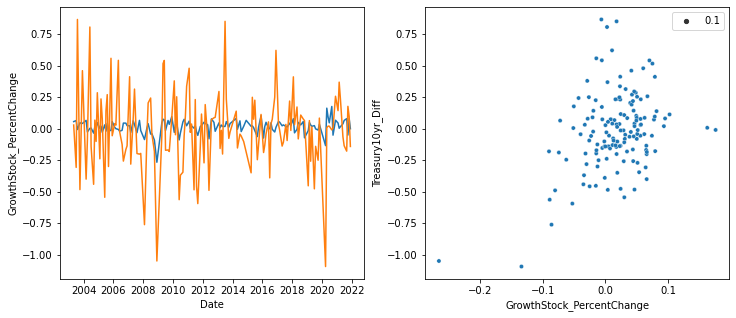

In [11]:
compare_indices(df, 'GrowthStock_PercentChange', 'Treasury10yr_Diff')

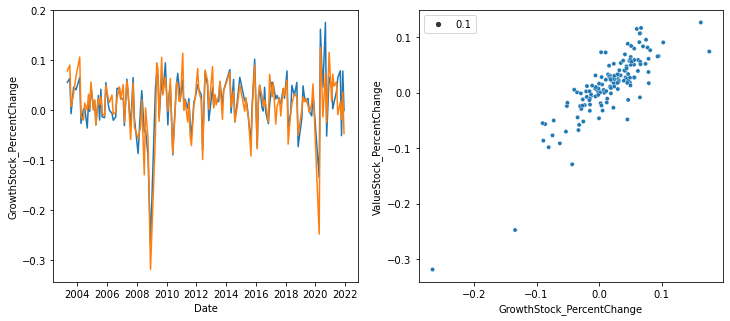

In [12]:
compare_indices(df, 'GrowthStock_PercentChange', 'ValueStock_PercentChange')

<AxesSubplot:xlabel='Date', ylabel='GrowthStock_AdjClose'>

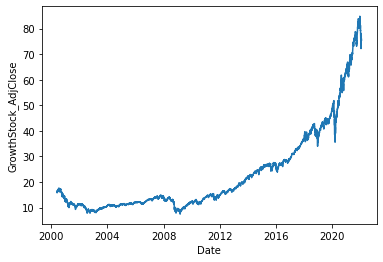

In [8]:
sns.lineplot(y='GrowthStock_AdjClose', x='Date', data = df)

<AxesSubplot:xlabel='Date', ylabel='GrowthStock_PercentChange'>

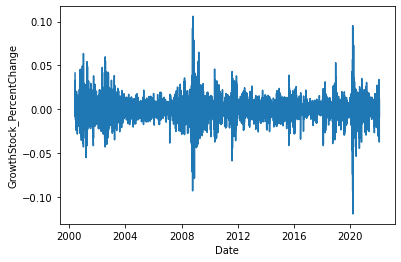

In [9]:
sns.lineplot(y='GrowthStock_PercentChange', x='Date', data = df)

<AxesSubplot:xlabel='Date', ylabel='Treasury10yr_AdjClose'>

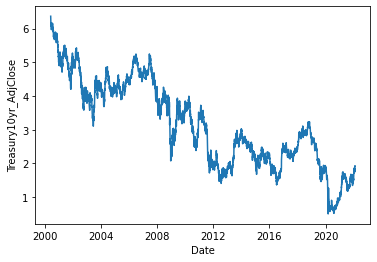

In [11]:
sns.lineplot(y='Treasury10yr_AdjClose', x='Date', data = df)

<AxesSubplot:xlabel='Date', ylabel='Treasury10yr_Diff'>

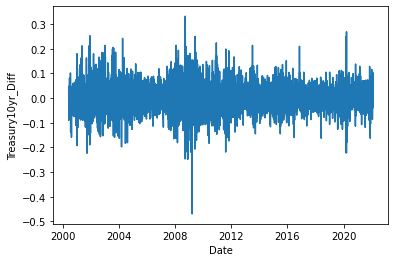

In [12]:
sns.lineplot(y='Treasury10yr_Diff', x='Date', data = df)

<AxesSubplot:xlabel='Treasury10yr_Diff', ylabel='GrowthStock_PercentChange'>

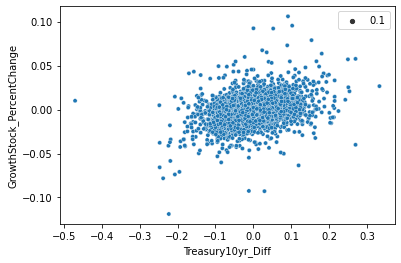

In [14]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'Treasury10yr_Diff', 
                y = 'GrowthStock_PercentChange',
                size = 0.1,
                data = df)

## Linear Regression

In [16]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence

In [17]:
X = df.Treasury10yr_PercentChange
y = df.GrowthStock_PercentChange
X = sm.add_constant(X)

model = OLS(y, X)
results = model.fit()

cooks_distance = OLSInfluence(results).cooks_distance[0]
to_remove = cooks_distance >= 4/(X.shape[0]-1)

/Users/lucheng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
X = X[~to_remove]
y = y[~to_remove]

model = OLS(y, X)
results = model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     GrowthStock_PercentChange   R-squared:                       0.100
Model:                                   OLS   Adj. R-squared:                  0.100
Method:                        Least Squares   F-statistic:                     575.0
Date:                       Thu, 10 Feb 2022   Prob (F-statistic):          1.44e-120
Time:                               11:53:49   Log-Likelihood:                 17135.
No. Observations:                       5167   AIC:                        -3.427e+04
Df Residuals:                           5165   BIC:                        -3.425e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0006      0.000      4.698      0.000       0.000       0.001
Treasury10yr_PercentChange     0.1485      0.006     23.979      0.000       0.136       0.161
==============================================================================
Omnibus:                       78.112   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.459
Skew:                          -0.123   Prob(JB):                     7.73e-29
Kurtosis:                       3.735   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

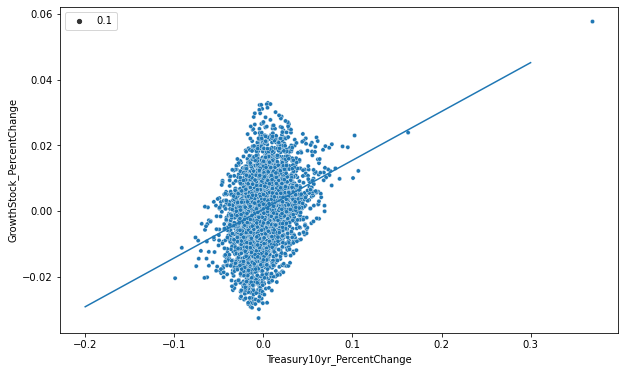

In [20]:
plt.figure(figsize = (10,6))

sns.scatterplot(x = X.iloc[:,1], 
                y = y,
                size = 0.1,
                data = df)

x0 = np.linspace(-0.2,0.3)
y0 = results.params[0] + results.params[1] * x0
plt.plot(x0, y0)

In [21]:
X = df.Treasury10yr_Diff
y = df.GrowthStock_PercentChange
X = sm.add_constant(X)

model = OLS(y, X)
results = model.fit()

cooks_distance = OLSInfluence(results).cooks_distance[0]
to_remove = cooks_distance >= 4/(X.shape[0]-1)

/Users/lucheng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
X = X[~to_remove]
y = y[~to_remove]

model = OLS(y, X)
results = model.fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     GrowthStock_PercentChange   R-squared:                       0.111
Model:                                   OLS   Adj. R-squared:                  0.110
Method:                        Least Squares   F-statistic:                     635.2
Date:                       Thu, 10 Feb 2022   Prob (F-statistic):          3.42e-132
Time:                               11:54:07   Log-Likelihood:                 17104.
No. Observations:                       5106   AIC:                        -3.420e+04
Df Residuals:                           5104   BIC:                        -3.419e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0007      0.000      5.479      0.000       0.000       0.001
Treasury10yr_Diff     0.0620      0.002     25.202      0.000       0.057       0.067
==============================================================================
Omnibus:                       64.278   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.338
Skew:                          -0.136   Prob(JB):                     1.98e-21
Kurtosis:                       3.612   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

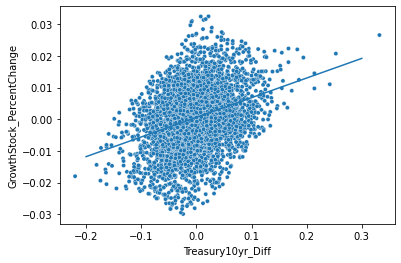

In [28]:
plt.figure(figsize = (6,4))

sns.scatterplot(x = X.iloc[:,1], 
                y = y,
                size = 0.01,
                data = df,
               legend = False)

x0 = np.linspace(-0.2,0.3)
y0 = results.params[0] + results.params[1] * x0
plt.plot(x0, y0)

In [47]:
IVW.Date = pd.to_datetime(IVW.Date)
IVW['Diff'] = (IVW['Adj Close'] - IVW['Adj Close'].shift(1))
IVW['Percent_Change'] = (IVW['Adj Close'] - IVW['Adj Close'].shift(1))/IVW['Adj Close'].shift(1)

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

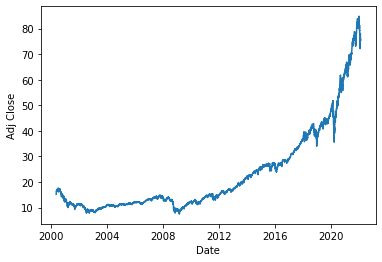

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
Adj_close = IVW['Adj Close']
Adj_close.index = df.Date.apply(lambda x: datetime.fromisoformat(x))
Adj_close.name = "Adj Close"
decomp = seasonal_decompose(Adj_close)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
# Plot decomposition
decomp.plot()
plt.tight_layout()
plt.xlabel('year')

## Neuron Network
#### Simple Regression Model

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

In [9]:
df.head()

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
1,2003-05-01,9.085768,0.056089,28.422388,0.079159,3.856,0.007578,0.029,1.4191,-0.036527,-0.0538,1.30,-0.207317,-0.34,1.89415,-0.129178,-0.28098
2,2003-07-01,9.670133,0.064317,31.000845,0.090719,3.549,-0.079616,-0.307,1.3492,-0.049257,-0.0699,1.45,0.115385,0.15,2.05556,0.085215,0.16141
3,2003-08-01,9.606513,-0.006579,31.233463,0.007504,4.415,0.244012,0.866,1.3960,0.034687,0.0468,1.75,0.206897,0.30,2.21607,0.078086,0.16051
4,2003-10-01,10.052144,0.046388,32.274162,0.033320,3.932,-0.109400,-0.483,1.3481,-0.034312,-0.0479,1.84,0.051429,0.09,2.04194,-0.078576,-0.17413
5,2003-12-01,10.467760,0.041346,34.494129,0.068785,4.392,0.116989,0.460,1.3023,-0.033974,-0.0458,2.04,0.108696,0.20,2.03520,-0.003301,-0.00674


In [45]:
y = df["GrowthStock_PercentChange"]
X = df[["Treasury10yr_PercentChange", "exchange_PercentChange", "inflation5yr"]]

# convert to np array
X = np.array(X, dtype = np.float32)
y = np.array(y, dtype = np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [46]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
# model training 

# input layer
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(300, activation='relu')(input_layer)
dense_layer_2 = Dense(300, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(300, activation='relu')(dense_layer_2)
# output layer
output = Dense(1)(dense_layer_3)

model1 = Model(inputs=input_layer, outputs=output)
model1.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [56]:
model1.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_28 (Dense)             (None, 300)               1200      
_________________________________________________________________
dense_29 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_30 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 301       
Total params: 182,101
Trainable params: 182,101
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model1.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Train on 80 samples, validate on 21 samples
Epoch 1/100
80/80 [==============================] - 2s 21ms/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 2/100
80/80 [==============================] - 0s 4ms/sample - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 3/100
80/80 [==============================] - 0s 4ms/sample - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4/100
80/80 [==============================] - 0s 5ms/sample - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5/100
80/80 [==============================] - 0s 5ms/sample - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/100
80/80 [==============================] - 0s 5ms/sample - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0025 - val_mean

80/80 [==============================] - 0s 4ms/sample - loss: 2.6440e-04 - mean_squared_error: 2.6440e-04 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 50/100
80/80 [==============================] - 0s 4ms/sample - loss: 2.6934e-04 - mean_squared_error: 2.6934e-04 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 51/100
80/80 [==============================] - 0s 4ms/sample - loss: 2.0262e-04 - mean_squared_error: 2.0262e-04 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 52/100
80/80 [==============================] - 0s 5ms/sample - loss: 2.2135e-04 - mean_squared_error: 2.2135e-04 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 53/100
80/80 [==============================] - 0s 4ms/sample - loss: 2.6982e-04 - mean_squared_error: 2.6982e-04 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 54/100
80/80 [==============================] - 0s 6ms/sample - loss: 2.6522e-04 - mean_squared_error: 2.6522e-04 - val_loss: 0.0040 - val_mean_squ

Epoch 97/100
80/80 [==============================] - 0s 6ms/sample - loss: 7.1370e-04 - mean_squared_error: 7.1370e-04 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 98/100
80/80 [==============================] - 0s 6ms/sample - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 99/100
80/80 [==============================] - 0s 5ms/sample - loss: 5.2409e-04 - mean_squared_error: 5.2409e-04 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 100/100
80/80 [==============================] - 0s 5ms/sample - loss: 3.7715e-04 - mean_squared_error: 3.7715e-04 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


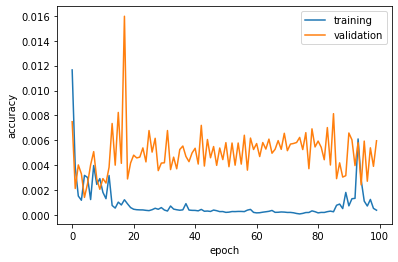

In [58]:
# plot the minimimal loss
plt.plot(history.history["mean_squared_error"], label = "training")
plt.plot(history.history["val_mean_squared_error"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

In [59]:
# model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

ValueError: Error when checking input: expected input_1 to have shape (1,) but got array with shape (3,)